In [87]:
#Import Libraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project_directory = r"C:\Users\Rayhan\Desktop\New folder\Python\Project_Files\Project_Files"
attendence_directory = r"C:\Users\Rayhan\Desktop\New folder\Python\Project_Files\Project_Files\Attendance_files"
quiz_directory = r"C:\Users\Rayhan\Desktop\New folder\Python\Project_Files\Project_Files\Quizes"
export_directory = r"C:\Users\Rayhan\Desktop\New folder\Python\Project_Files\Project_Files"

In [3]:
#Change WOrking Directory to project folder
os.chdir(project_directory)

In [4]:
#list file and folders of project directory
project_files = os.listdir()

In [5]:
#switch to attendence folder
os.chdir(attendence_directory)

In [6]:
attendence_files = os.listdir()

In [7]:
#switch back
os.chdir(project_directory)

In [8]:
#see the name of project folder's files
project_files

['.ipynb_checkpoints',
 'Assignment.csv',
 'Attendance_files',
 'Grade Sheet of Students.csv',
 'Lab Exam.csv',
 'Lab Exam.xlsx',
 'made_attendence_mark.csv',
 'made_student_db.csv',
 'project_details.rtf',
 'project_rayhan.ipynb',
 'project_rayhan_final.ipynb',
 'Quizes',
 'rayhan_project.ipynb',
 '~$oject_details.rtf']

In [9]:
#read assignment mark file
assignment_mark = pd.read_csv( 'Assignment.csv' )

In [10]:
#drop unnecessary columns
assignment_mark = assignment_mark.drop(columns="SL")

In [11]:
#make a student Database
student_db = assignment_mark["Student ID"]

In [12]:
#join first and last name to get full name, will be used for attendence
student_names = assignment_mark["Name"].tolist()
student_full_names = []
for name in student_names:
    if len(name.split(","))==2:
        new_name = name.split(", ")[1]+ " " + name.split(",")[0]
    else:
        new_name = name
    
    student_full_names.append(new_name)
student_names = pd.DataFrame(student_full_names)
student_names.columns=["Full Name"]

In [13]:
#concat full names with our result databse
student_db = pd.concat([student_db,student_names],axis=1)
student_db.columns = ["Student ID","Full Name"]

In [14]:
#set index to Student ID, will be used as unique identifier
student_db = student_db.set_index('Student ID')

In [15]:
#set index to Student ID, will be used as unique identifier
assignment_mark  = assignment_mark.set_index('Student ID')

In [16]:
#drop old name column, we have full names now
assignment_mark = assignment_mark.drop(columns=["Name"])

In [17]:
#add assignment mark to the db
student_db = pd.concat([student_db,assignment_mark],axis=1)

In [18]:
#rename assignment marks column
student_db = student_db.rename(columns={"Ass.":"Assignment Marks"})

In [19]:
#load lab result file
lab_exam = pd.read_csv( 'Lab Exam.csv' )

In [20]:
#slice our needed data
lab_mark = lab_exam[["Email",'Total points']]

In [21]:
#get student id from email
stud_id = []
for mail in lab_mark["Email"]:
    stud_id.append(mail.split("@")[0])
stud = pd.DataFrame(stud_id,columns=["Student ID"])

In [22]:
#make a lab mark datasheet
lab_mark = pd.concat([stud,lab_mark],axis=1)

In [23]:
#set index to Student ID, will be used as unique identifier
lab_mark = lab_mark.set_index("Student ID")

In [24]:
#drop email column
lab_mark = lab_mark.drop(columns="Email")

In [25]:
#rename column name
lab_mark.columns=["Lab Marks"]



In [26]:
#add lab marks to our db
student_db = pd.concat([student_db,lab_mark],axis=1)

In [27]:
#change to quiz marks folder
os.chdir(quiz_directory)

In [28]:
#read data
quiz_1 = pd.read_csv("Quiz 1.csv")[['Email','Total points']]

In [29]:
#read data
quiz_2 = pd.read_csv("Quiz 2.csv")[['Email','Total points']]

In [30]:
#read data
quiz_3 = pd.read_csv("Quiz 3.csv")[['Email','Total points']]

In [31]:
#get student id from email for quiz 1
stud_id = []
for mail in quiz_1["Email"]:
    stud_id.append(mail.split("@")[0])
stud = pd.DataFrame(stud_id,columns=["Student ID"])
quiz_1 = pd.concat([stud,quiz_1],axis=1).sort_values('Student ID').reset_index(drop=True)

In [32]:
#get student id from email for quiz 2
stud_id = []
for mail in quiz_2["Email"]:
    stud_id.append(mail.split("@")[0])
stud = pd.DataFrame(stud_id,columns=["Student ID"])
quiz_2 = pd.concat([stud,quiz_2],axis=1).sort_values('Student ID').reset_index(drop=True)

In [33]:
#get student id from email for quiz 3
stud_id = []
for mail in quiz_3["Email"]:
    stud_id.append(mail.split("@")[0])
stud = pd.DataFrame(stud_id,columns=["Student ID"])
quiz_3 = pd.concat([stud,quiz_3],axis=1).sort_values('Student ID').reset_index(drop=True)

In [34]:
#set index to Student ID, will be used as unique identifier
quiz_1 = quiz_1.set_index("Student ID")
quiz_1 = quiz_1.drop(columns=["Email"])
quiz_1.columns=["Quiz 1"]

In [35]:
#set index to Student ID, will be used as unique identifier
quiz_2 = quiz_2.set_index("Student ID")
quiz_2 = quiz_2.drop(columns=["Email"])
quiz_2.columns=["Quiz 2"]

In [36]:
#set index to Student ID, will be used as unique identifier
quiz_3 = quiz_3.set_index("Student ID")
quiz_3 = quiz_3.drop(columns=["Email"])
quiz_3.columns=["Quiz 3"]

In [37]:
quiz_mark = pd.concat([quiz_1,quiz_2,quiz_3],sort=False,axis=1)

In [38]:
#replace Nan Values, or undefined values with 0
quiz_mark = quiz_mark.fillna(0)

In [39]:
def best_marks(mark1,mark2,mark3):
    return max([mark1+mark2,mark2+mark3,mark3+mark1])

In [40]:
best_quiz_score = []
qm = quiz_mark.values.tolist()
for marks in qm:
    best_quiz_score.append(best_marks(marks[0],marks[1],marks[2]))
bqs = pd.DataFrame(best_quiz_score,columns=["Best Score"])
bqs = bqs.set_index(quiz_mark.index.values)

In [41]:
quiz_mark = pd.concat([quiz_mark,bqs],axis=1)

In [42]:
student_db = pd.concat([student_db,quiz_mark],axis=1)

In [43]:
#switch to attendence folder
os.chdir(attendence_directory)

In [44]:
files = os.listdir()

In [45]:
files

['Week_1_Lab.csv',
 'Week_1_Theory.csv',
 'Week_2_Theory.csv',
 'Week_4_Lab_(Makeup).csv',
 'Week_5_Lab.csv']

In [46]:
#create a blank df, to append attendence marks to
attendance_df = pd.DataFrame()

In [47]:
#create attendence sheet from attendence files
for file in files:
    df = pd.read_csv(file)
    df = df.set_index("Full Name")
    df = df.drop(columns=["Timestamp"])
    df = df[df["User Action"] != "Left"]
    df = df[~df.index.duplicated(keep='first')]
    df.columns=[file.split(".")[0]]
    
    attendance_df = pd.concat([attendance_df,df],axis=1)

In [48]:
#for joining a class, student gets 2 mark
attendance_df = attendance_df.replace("Joined",2)

In [49]:
#for not joining, which is now NaN valued, Student gets 0
attendance_df = attendance_df.fillna(0)

In [50]:
#count total attendence Mark
Attendence_Marks = []
for row in range(len(attendance_df)):
    temp_total_mark=0
    for col in range(len(attendance_df.columns)):
        temp_total_mark = temp_total_mark + attendance_df.iloc[row,col]
    Attendence_Marks.append(temp_total_mark)

In [51]:
#create total attendece marks
Attendence_Marks = pd.DataFrame(Attendence_Marks,columns=["Total Attendence Marks"],index=attendance_df.index)

In [52]:
#add total marks to attendence sheet
attendance_df = pd.concat([attendance_df,Attendence_Marks],axis=1)

In [53]:
#reset index of our database
student_db = student_db.reset_index()

In [54]:
#rename columns
student_db.columns = ['Student ID', 'Full Name', 'Assignment Marks', 'Lab Marks', 'Quiz 1', 'Quiz 2', 'Quiz 3',
       'Best Quiz Score']

In [55]:
#set index to full name
student_db = student_db.set_index("Full Name")

In [56]:
#add attendence mark
student_db = pd.concat([student_db,attendance_df],axis=1)

In [57]:
#drop students who didn't participate in exam
student_db = student_db.dropna()

In [58]:
#rename columns
student_db.columns = ['Student ID', 'Assignment Marks', 'Lab Marks', 'Quiz 1', 'Quiz 2', 'Quiz 3',
       'Best Quiz Score', 'Week_1_Lab', 'Week_1_Theory', 'Week_2_Theory',
       'Week_4_Lab_(Makeup)', 'Week_5_Lab', 'Total Attendence Marks']

In [59]:
#for grading, add marks whhich are in following columns
summable_columns = [1,2,6,12]

In [60]:
def grader(score):
    if score>=90:
        return "A+"
    elif score>=85 and score<90:
        return "A"
    elif score>=80 and score<85:
        return "B+"
    elif score>=75 and score<80:
        return "B"
    elif score>=70 and score<75:
        return "C+"
    elif score>=65 and score<70:
        return "C+"
    elif score>=60 and score<65:
        return "D+"
    elif score>=50 and score<60:
        return "D"
    else:
        return "F"

In [61]:
#count total mark and grades
total_marks = []
grades=[]
for i in range(len(student_db)):
    total_mark = 0
    for col in summable_columns:
        total_mark +=student_db.iloc[i,col]
    total_marks.append(total_mark)
    grades.append(grader(total_mark))

In [62]:
total_marks_df=pd.DataFrame(total_marks,columns=["Total Score"],index=student_db.index)
grades_df = pd.DataFrame(grades,columns=["Obtained Grade"],index=student_db.index)

In [63]:
#add marks and grades
student_db = pd.concat([student_db,total_marks_df,grades_df],axis=1)

In [64]:
#reset index
student_db = student_db.reset_index()

In [65]:
#rename columns
student_db.columns = ['Full Name', 'Student ID', 'Assignment Marks', 'Lab Marks', 'Quiz 1', 'Quiz 2',
       'Quiz 3', 'Best Quiz Score', 'Week_1_Lab', 'Week_1_Theory',
       'Week_2_Theory', 'Week_4_Lab_(Makeup)', 'Week_5_Lab',
       'Total Attendence Marks', 'Total Score', 'Obtained Grade']

In [66]:
#rearrange columns
student_db = student_db.reindex(columns=['Student ID','Full Name', 'Assignment Marks', 'Lab Marks', 'Quiz 1', 'Quiz 2',
       'Quiz 3', 'Best Quiz Score', 'Week_1_Lab', 'Week_1_Theory',
       'Week_2_Theory', 'Week_4_Lab_(Makeup)', 'Week_5_Lab',
       'Total Attendence Marks', 'Total Score', 'Obtained Grade'])

In [67]:
#export result sheet
os.chdir(export_directory)
student_db.to_csv("Grade Sheet of Students.csv")

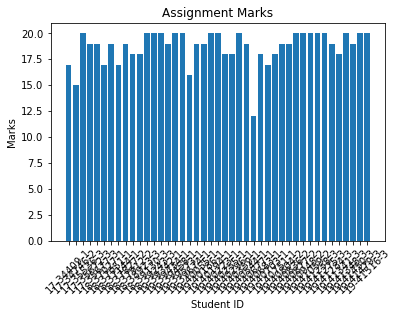

In [86]:

plt.figure()
plt.bar(student_db["Student ID"],student_db["Assignment Marks"])
plt.xticks(rotation=45)
plt.xlabel("Student ID")
plt.ylabel("Marks")
plt.title("Assignment Marks")
plt.savefig("Assignment.png",dpi=1000,facecolor="white")

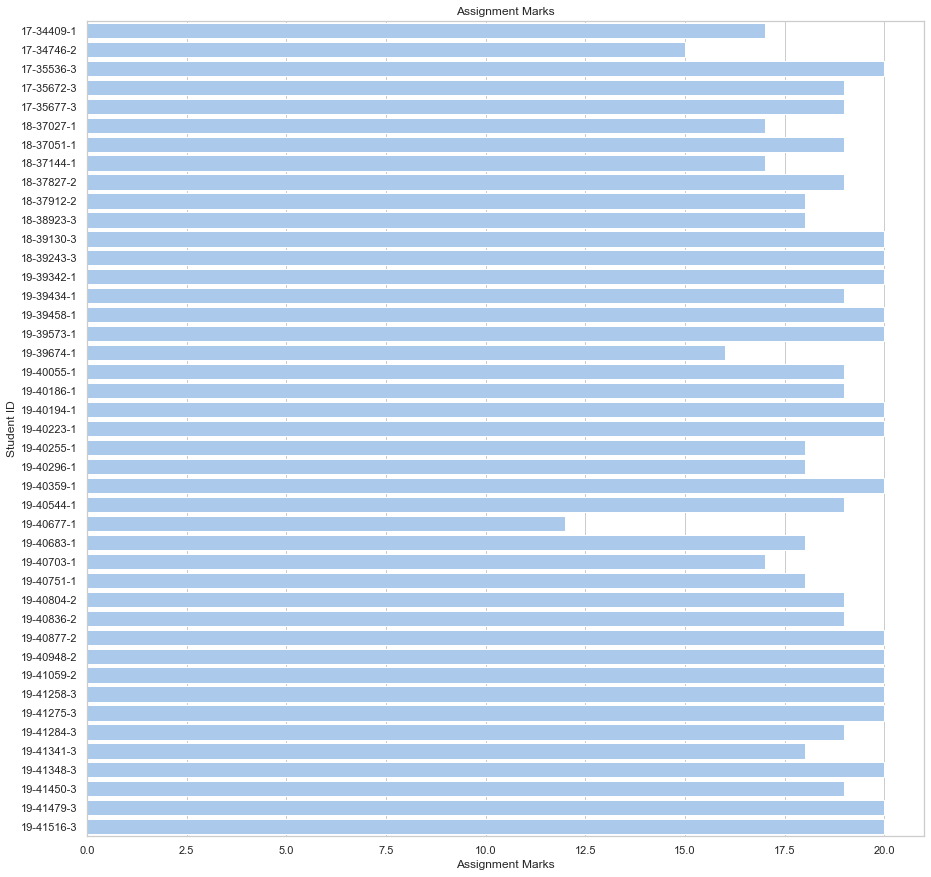

In [104]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))


# Plot the total dataset
sns.set_color_codes("pastel")
barplot = sns.barplot(x=student_db["Assignment Marks"], y=student_db["Student ID"],
            label="Total", color="b")
barplot.set(title='Assignment Marks')
fig = barplot.get_figure()
fig.savefig("Assignment.png",dpi=300)

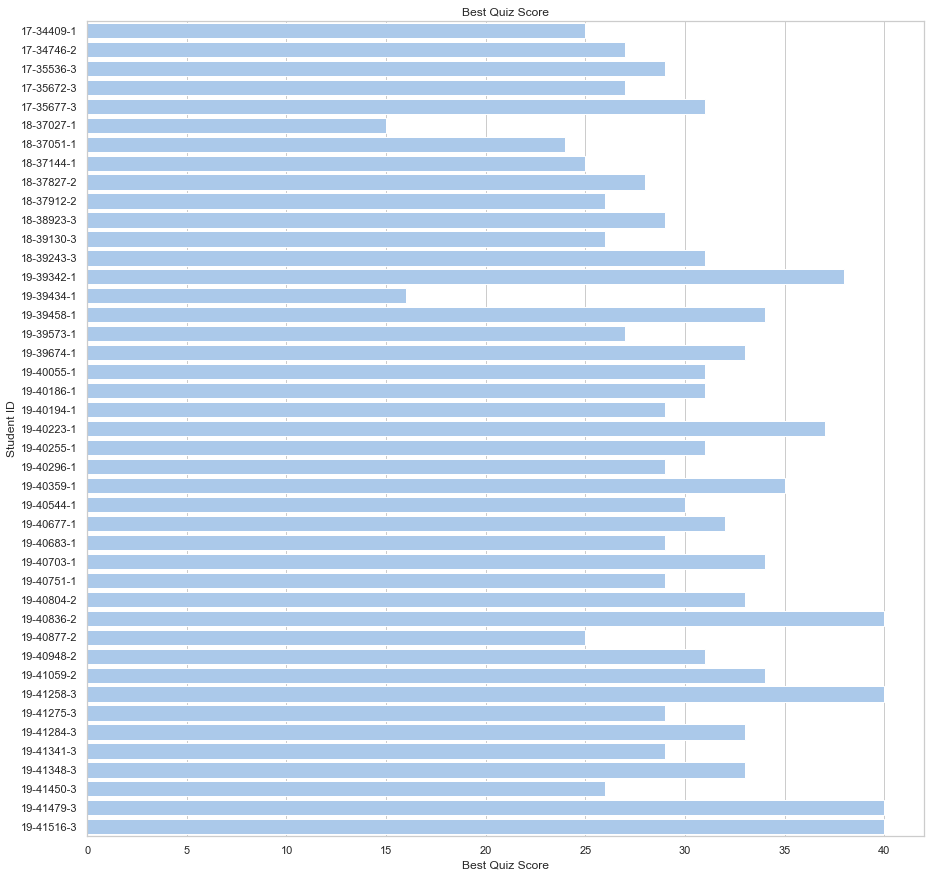

In [108]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))


# Plot the total dataset
sns.set_color_codes("pastel")
barplot = sns.barplot(x=student_db["Best Quiz Score"], y=student_db["Student ID"],
            label="Total", color="b")
barplot.set(title='Best Quiz Score')
fig = barplot.get_figure()
fig.savefig("Best Quiz Score",dpi=300)

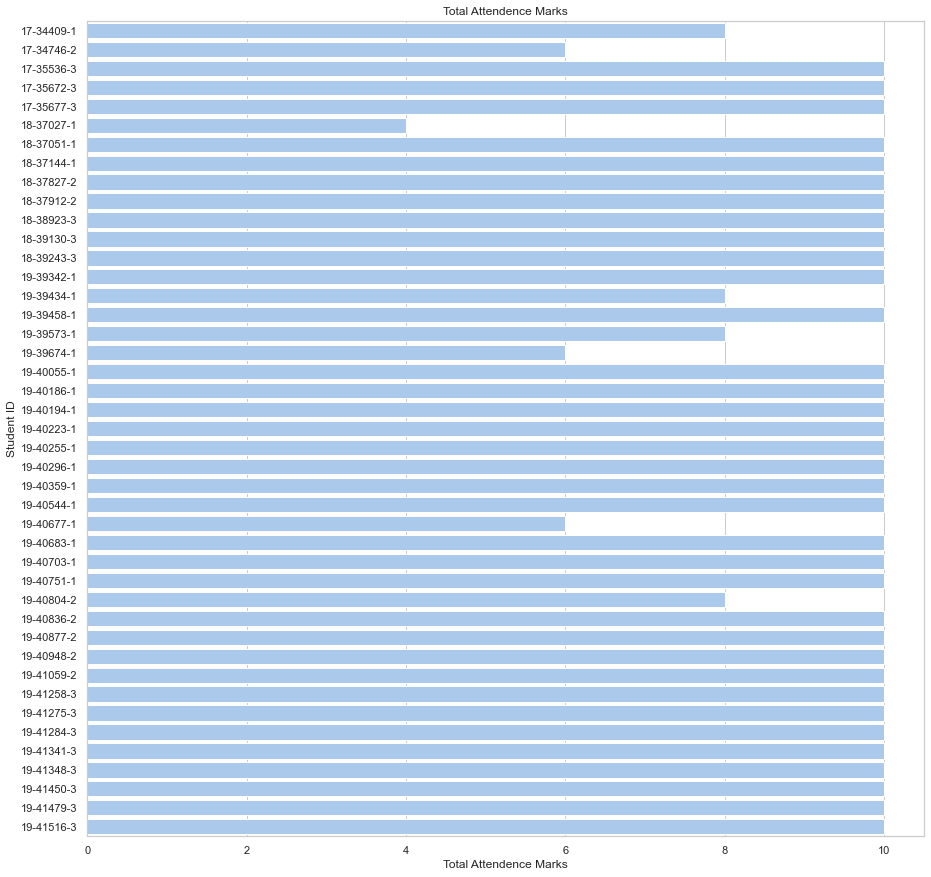

In [109]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))


# Plot the total dataset
sns.set_color_codes("pastel")
barplot = sns.barplot(x=student_db["Total Attendence Marks"], y=student_db["Student ID"],
            label="Total", color="b")
barplot.set(title="Total Attendence Marks")
fig = barplot.get_figure()
fig.savefig("Total Attendence Marks.png",dpi=300)

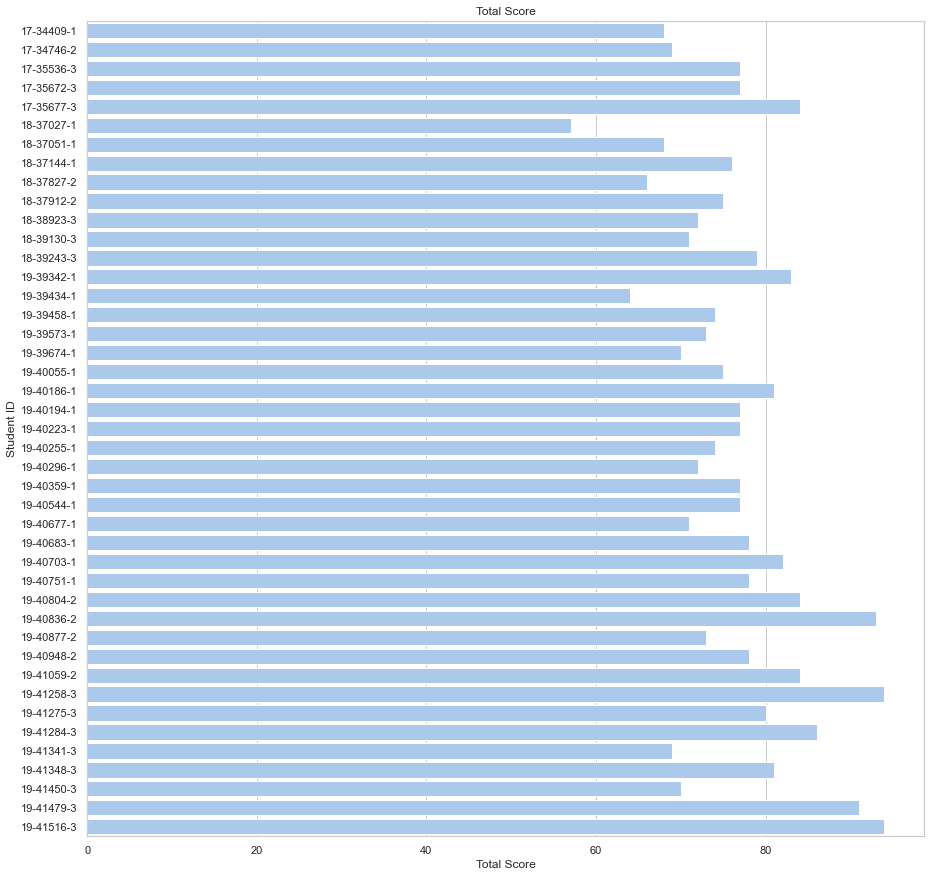

In [110]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))


# Plot the total dataset
sns.set_color_codes("pastel")
barplot = sns.barplot(x=student_db["Total Score"], y=student_db["Student ID"],
            label="Total", color="b")
barplot.set(title="Total Score")
fig = barplot.get_figure()
fig.savefig("Total Score",dpi=300)

In [112]:
grade_summary = student_db["Obtained Grade"].value_counts()

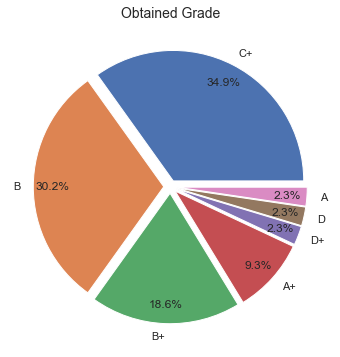

In [146]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = grade_summary.keys()
plt.pie(x=grade_summary, autopct="%.1f%%", labels=labels, pctdistance=.85, explode=[0.05]*7)
plt.title("Obtained Grade", fontsize=14);
pie.savefig("Obtained_grade.png",dpi=300)